In [4]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sms

df = pd.read_csv('steam_reviews.csv', usecols=['app_name','review','recommended'])


(2.1)

In [6]:
###(2.1)Identify which applications have the highest and lowest number of reviews###

review_counts = df.groupby('app_name').size() #count number of reviews for each app
#application with the highest number of reviews
highest_reviews_app = review_counts.idxmax() #app
highest_reviews_count = review_counts.max() #number

#application with the lowest number of reviews
lowest_reviews_app = review_counts.idxmin()
lowest_reviews_count = review_counts.min()

# Display the results
print(f"Application with the highest number of reviews: {highest_reviews_app} ({highest_reviews_count} reviews)")
print(f"Application with the lowest number of reviews: {lowest_reviews_app} ({lowest_reviews_count} reviews)")

Application with the highest number of reviews: PLAYERUNKNOWN'S BATTLEGROUNDS (1644255 reviews)
Application with the lowest number of reviews: Neon Hardcorps (200 reviews)


(2.2)

/var/folders/tx/0r7d70vd1r5fj6hhc8kdkh680000gn/T/ipykernel_56338/3891678835.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sms.barplot( x=review_counts.values, y=review_counts.index, palette='viridis')
/Users/jacopocaldana/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacopocaldana/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacopocaldana/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.


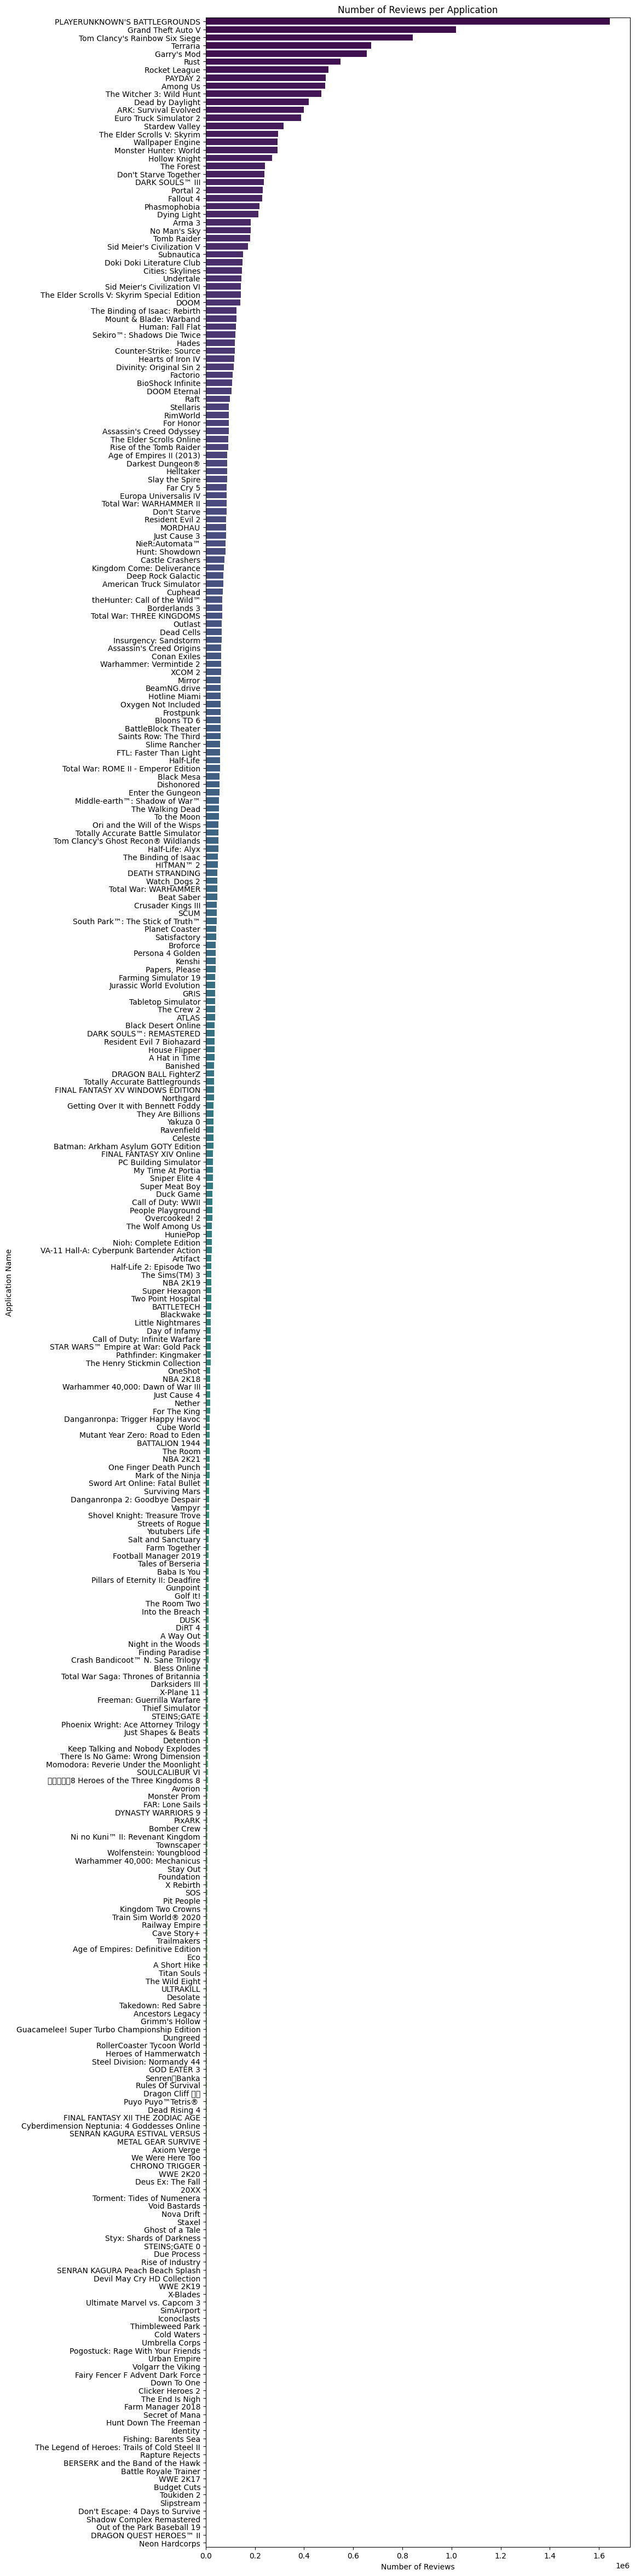

In [7]:
###(2.2)Plot the number of reviews for each application in descending order###
import matplotlib.pyplot as plt

review_counts = review_counts.sort_values(ascending=False) #sorting in descending orted

plt.figure(figsize=(10, 60))


sms.barplot( x=review_counts.values, y=review_counts.index, palette='viridis')

plt.title('Number of Reviews per Application')
plt.xlabel('Number of Reviews')
plt.ylabel('Application Name')
plt.show()

It is noticeble that the application with the most reviews nearly doubles the application with the second most reviews. Whereas in the rest of the graph the number of reviews decreases smoothly and uniformly.

In [10]:
#Add different coloumns I need to work on.

df=pd.read_csv('steam_reviews.csv', usecols=['app_name','review','recommended','steam_purchase','received_for_free'])


(2.3)

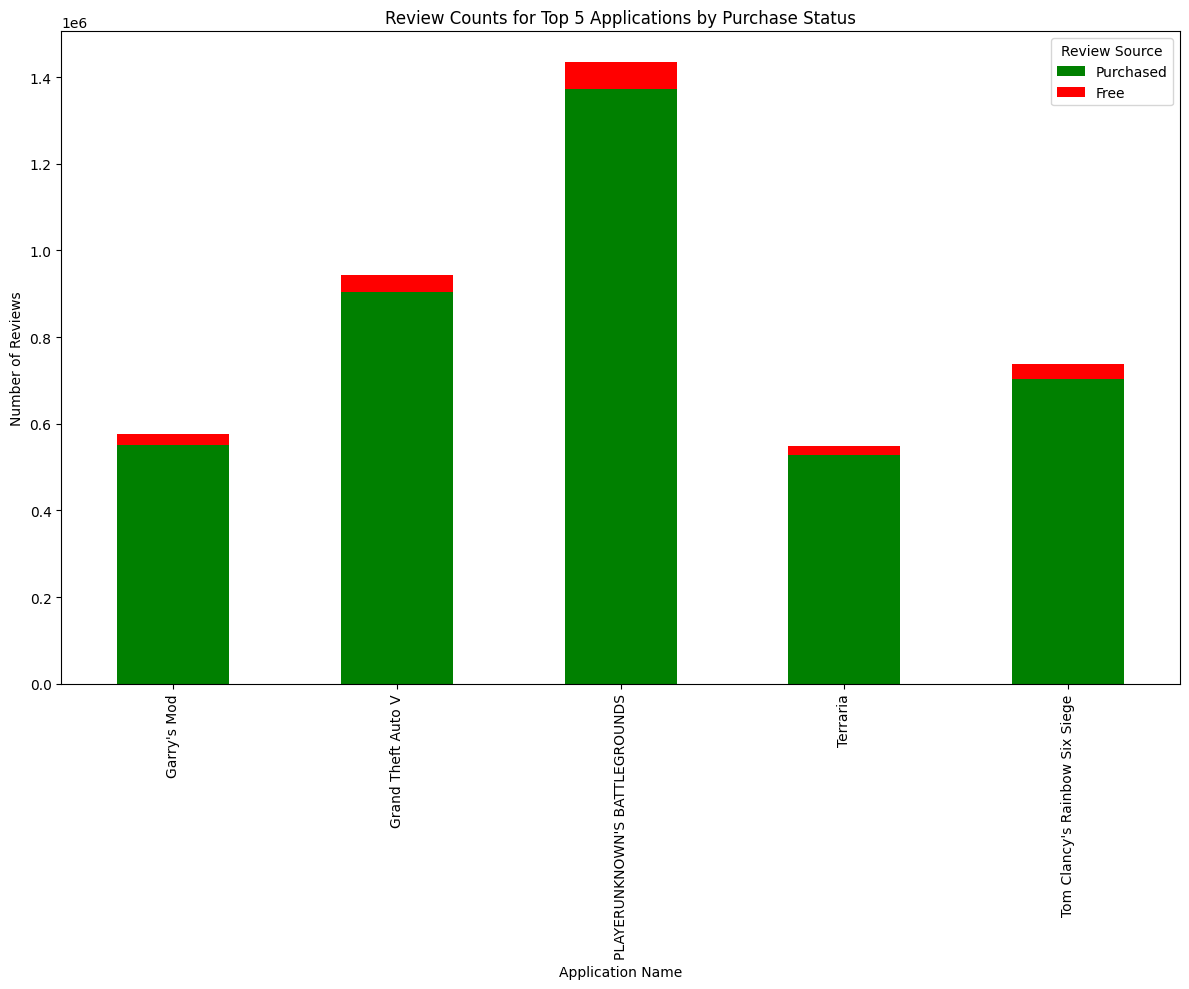

Review Counts from Users Who Purchased vs. Received for Free:
                          app_name  Purchased   Free  Purchased (%)  Free (%)
0                     Garry's Mod     551250  24765      95.700633  4.299367
1              Grand Theft Auto V     905288  38624      95.908093  4.091907
2   PLAYERUNKNOWN'S BATTLEGROUNDS    1372721  61443      95.715762  4.284238
3                        Terraria     527762  20154      96.321699  3.678301
4  Tom Clancy's Rainbow Six Siege     702505  36300      95.086660  4.913340


In [12]:
##(2.3)

#number of reviews for each application
review_counts = df['app_name'].value_counts()

#top 5 apps
top_5_apps = review_counts.head(5).index

# Filter the original DataFrame for the top 5 applications
top_5_reviews = df[df['app_name'].isin(top_5_apps)]

# Count reviews for each based on if the app was purchased or free.
purchase_counts = top_5_reviews.groupby(['app_name']).agg({
    'steam_purchase': 'sum',
    'received_for_free': 'sum'
}).reset_index()

# Rename the columns of the original dataset to visualize more clearly.
purchase_counts.rename(columns={'steam_purchase': 'Purchased', 'received_for_free': 'Free'}, inplace=True)

# We calculate the total and the percentages
purchase_counts['Total'] = purchase_counts['Purchased'] + purchase_counts['Free']
purchase_counts['Purchased (%)'] = (purchase_counts['Purchased'] / purchase_counts['Total']) * 100
purchase_counts['Free (%)'] = (purchase_counts['Free'] / purchase_counts['Total']) * 100


purchase_counts.set_index('app_name')[['Purchased', 'Free']].plot(kind='bar', stacked=True, figsize=(12, 10), color=['green', 'red'])


plt.title('Review Counts for Top 5 Applications by Purchase Status')
plt.xlabel('Application Name')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Source', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Print the review counts with percentages
print("Review Counts from Users Who Purchased vs. Received for Free:\n", purchase_counts[['app_name', 'Purchased', 'Free', 'Purchased (%)', 'Free (%)']])

For each application there is a similiar distribution between the number of users that purchased it, around 96%, and the number of users that received it for free, around 4%.

(2.4)

In [11]:
###(2.4)Which applications have the most and the least user recommendations? ###
recommendation_counts = df.groupby('app_name')['recommended'].sum().reset_index()


most_recommended_index = recommendation_counts['recommended'].idxmax() #app
least_recommended_index = recommendation_counts['recommended'].idxmin()#number

m_name = recommendation_counts.loc[most_recommended_index, 'app_name']
l_name = recommendation_counts.loc[least_recommended_index, 'app_name']

m_count = recommendation_counts['recommended'].max()
l_count = recommendation_counts['recommended'].min()

print(f"Most Recommended Application:\n- Name: {m_name}\n- Recommendations: {m_count}\n")
print(f"Least Recommended Application:\n- Name: {l_name}\n- Recommendations: {l_count}\n")

Most Recommended Application:
- Name: PLAYERUNKNOWN'S BATTLEGROUNDS
- Recommendations: 886417

Least Recommended Application:
- Name: Neon Hardcorps
- Recommendations: 89



If we take a moment to check the graph (2.4) that shows in descending order the number bof reviews for each application, we can observe that the most and least recommended apps correspond to the games with the highest and lowest number of reviews.

In [83]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import statsmodels.api as sm

(2.4) To answer this question we need first to create a variable for review scores because it does not exist in the original dataset. One possible idea we came up with is to calculate the ration between the number of positive and negative reviews for each game and then categorise them in tenths.

In [15]:
#Calculate positive and total reviews groupping by app name
review_counts = df.groupby('app_name').agg(
    positive_reviews=('recommended', 'sum'), #Sum of recommended reviews (1s)
    total_reviews=('recommended', 'count')   # Total number of reviews (1s and 0s)
).reset_index()

#Calculate negative reviews as total minus positive reviews
review_counts['negative_reviews'] = review_counts['total_reviews'] - review_counts['positive_reviews']

#Calculate the ratio of positive to negative reviews, avoiding division by zero
review_counts['review_ratio'] = review_counts.apply(
    lambda row: row['positive_reviews'] / row['negative_reviews'] if row['negative_reviews'] > 0 else 1,
    axis=1
)

#Categorize the ratio into tenths to create the review score
review_counts['review_score'] = pd.qcut(review_counts['review_ratio'], 10, labels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

#Calculate the correlation between total recommendations and review score
from scipy.stats import pearsonr

# Assuming `review_counts['positive_reviews']` approximates the total recommendations per app
correlation, p_value = pearsonr(review_counts['positive_reviews'], review_counts['review_score'].astype(float))

print(f"Correlation: {correlation}, p-value: {p_value}")

Correlation: 0.15359449760402244, p-value: 0.006306195010676166


By how it is built the review_score variable, it is almost tautological that there is a corrlation. Actually we was expecting a higher rate, much closer to 1 than 0.15.

In [18]:
df=pd.read_csv('steam_reviews.csv', usecols=['app_name','recommended','author.playtime_forever','author.playtime_at_review'])

4. [**RQ4**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   - Analyze the relationship between the amount of time a user has spent on an application and their review score.